In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
from sklearn import datasets
from numpy import linalg as LA
from sklearn.metrics.pairwise import pairwise_distances
import sys
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer

In [36]:
trans_data = pd.read_csv("/content/drive/MyDrive/Private/Image_Similarity/daily_trans_norm22.csv")
trans_data = trans_data.iloc[:,1:]
trans_data.index = np.arange(1, len(trans_data) + 1)
trans_data.head(3)

,"sp(43.0,-33.0)","sp(42.75,-33.0)","sp(42.5,-33.0)","sp(42.25,-33.0)","sp(42.0,-33.0)","sp(41.75,-33.0)","sp(41.5,-33.0)","sp(41.25,-33.0)","sp(41.0,-33.0)","sp(40.75,-33.0)",...,"t2m(35.25,-23.0)","t2m(35.0,-23.0)","t2m(34.75,-23.0)","t2m(34.5,-23.0)","t2m(34.25,-23.0)","t2m(34.0,-23.0)","t2m(33.75,-23.0)","t2m(33.5,-23.0)","t2m(33.25,-23.0)","t2m(33.0,-23.0)"
1,0.769017,0.763551,0.758399,0.754214,0.749653,0.744597,0.739195,0.733298,0.726633,0.719377,...,0.307300,0.312956,0.318721,0.328563,0.334153,0.337154,0.340863,0.343122,0.338263,0.331969
2,0.550508,0.539280,0.528615,0.520168,0.510767,0.500749,0.491037,0.481886,0.472325,0.462340,...,0.366677,0.364151,0.363580,0.368759,0.371705,0.372464,0.370914,0.367119,0.358756,0.353140
3,0.406872,0.391876,0.377439,0.365852,0.353486,0.340685,0.327491,0.314235,0.300378,0.286403,...,0.382203,0.384572,0.381714,0.380983,0.379379,0.377956,0.377146,0.375601,0.372759,0.375038


In [3]:
# #path2 = ('/content/drive/MyDrive/Data/mock.nc')
# #path2 = ('/content/drive/MyDrive/Private/Image_Similarity/mock1.nc')
# #path2 = ('/content/drive/MyDrive/Data/mock_v2.nc')
# #path2 = ('/content/drive/MyDrive/Data/mock_v2.1.nc')
# #path2 = ('/content/drive/MyDrive/Data/mock_v3.nc')
# #path2 = ('/content/drive/MyDrive/Data/mock_v3.1.nc')
# path2 = ('/content/drive/MyDrive/Data/mock_v4.nc')
# #path2 = ('/content/drive/MyDrive/Data/ERA5_meteo_sfc_2021_daily.nc')
# #path2 = ('/content/drive/MyDrive/Data/ERA5_meteo_sfc_2021_daily_smalldomain.nc')
# #path2 = ('/content/drive/MyDrive/Data/ERA5_meteo_sfc_2021_hourly.nc')
# #path2 = ('/content/drive/MyDrive/Data/ERA5_meteo_sfc_2021_hourly_smalldomain.nc')
# data = xr.open_dataset(path2, decode_times=False) #To view the date as integers of 0, 1, 2,....
# #data = xr.open_dataset(path2)# decode_times=False) #To view the date as integers of 0, 1, 2,....
# #data5 = xr.open_dataset(path2) # To view time in datetime format
# data

In [37]:
pca = PCA(n_components=11)
principalComponents = pca.fit_transform(trans_data)
trans_data = pd.DataFrame(data = principalComponents
             , columns = ['PC_1', 'PC_2', 'PC_3','PC_4', 'PC_5', 'PC_6','PC_7', 'PC_8', 'PC_9','PC_10', 'PC_11'])

In [26]:
# pca = PCA(n_components=3)
# principalComponents = pca.fit_transform(trans_data)
# trans_data = pd.DataFrame(data = principalComponents
#              , columns = ['PC_1', 'PC_2', 'PC_3'])

In [39]:
trans_data.index = np.arange(1, len(trans_data) + 1)
trans_data

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11
1,14.328984,5.606987,-5.204885,12.194085,-0.825694,-4.529356,0.694313,0.904996,1.887883,-0.472180,0.592544
2,14.957689,-1.524946,-2.361496,18.392509,0.186625,-4.072603,-1.756697,3.100150,3.021399,2.228472,2.071069
3,15.526778,-8.950955,1.690469,21.770105,-4.871350,-2.274153,-1.098372,4.251684,2.159362,4.446975,1.603628
4,16.389001,-10.857179,3.874567,17.919476,-7.860215,-1.182745,-4.856464,3.571120,-3.837225,2.266015,-1.042917
5,16.727043,-6.238771,7.228452,21.994348,-7.489061,-5.323607,-5.212077,4.896106,-1.469530,1.188189,-0.076798
...,...,...,...,...,...,...,...,...,...,...,...
361,10.058760,-20.981553,-2.595284,-1.207836,4.150197,2.409976,-4.866501,1.233953,4.593244,0.712760,-1.230008
362,10.803433,-25.945878,-5.390507,2.160048,4.050436,2.240109,-0.614656,0.830943,6.883618,0.011433,-0.276079
363,14.400948,-18.954545,8.912374,2.606090,4.530542,2.369073,2.829505,3.111842,2.040401,-3.150609,3.045126
364,16.296198,-20.407814,15.441413,6.122403,5.511515,2.673390,-0.928345,-0.055634,1.736785,-0.469031,3.703340


In [40]:
trans_data = trans_data.values[:,:]

In [41]:
trans_data

array([[ 14.32898389,   5.60698673,  -5.20488543, ...,   1.88788267,
         -0.47217955,   0.59254407],
       [ 14.9576888 ,  -1.52494609,  -2.36149555, ...,   3.02139879,
          2.22847184,   2.07106888],
       [ 15.52677779,  -8.9509548 ,   1.69046884, ...,   2.15936165,
          4.44697526,   1.6036279 ],
       ...,
       [ 14.40094806, -18.95454497,   8.91237445, ...,   2.04040077,
         -3.1506094 ,   3.04512598],
       [ 16.29619769, -20.40781438,  15.44141257, ...,   1.7367849 ,
         -0.46903132,   3.70334036],
       [ 16.66115244, -14.67802527,  22.65635322, ...,   2.79091245,
          1.69555759,   3.03695512]])

In [43]:
trans_data.shape[0]

365

In [44]:
def find_clusters(input,linkage):
    clusters = {}
    row_index = -1
    col_index = -1
    array = []
    

    for n in range(input.shape[0]):
        array.append(n)
        
    clusters[0] = array.copy()

    #finding minimum value from the distance matrix
    #note that this loop will always return minimum value from bottom triangle of matrix
    for k in range(1, input.shape[0]):
        min_val = sys.maxsize
        
        for i in range(0, input.shape[0]):
            for j in range(0, input.shape[1]):
                if(input[i][j]<=min_val):
                    min_val = input[i][j]
                    row_index = i
                    col_index = j
                    
        #once we find the minimum value, we need to update the distance matrix
        #updating the matrix by calculating the new distances from the cluster to all points
        
        #for Single Linkage
        if(linkage == "single" or linkage =="Single"):
            for i in range(0,input.shape[0]):
                if(i != col_index):
                    #we calculate the distance of every data point from newly formed cluster and update the matrix.
                    temp = min(input[col_index][i],input[row_index][i])
                    #we update the matrix symmetrically as our distance matrix should always be symmetric
                    input[col_index][i] = temp
                    input[i][col_index] = temp
        #for Complete Linkage
        elif(linkage=="Complete" or linkage == "complete"):
             for i in range(0,input.shape[0]):
                if(i != col_index and i!=row_index):
                    temp = min(input[col_index][i],input[row_index][i])
                    input[col_index][i] = temp
                    input[i][col_index] = temp
        #for Average Linkage
        elif(linkage=="Average" or linkage == "average"):
             for i in range(0,input.shape[0]):
               if(i != col_index and i!=row_index):
                    temp = (input[col_index][i]+input[row_index][i])/2
                    input[col_index][i] = temp
                    input[i][col_index] = temp
        
        elif(linkage=="Centroid" or linkage =="centroid"):
            for i in range(0,input.shape[0]):
                if(i!=col_index and i!=row_index):
                    dist_centroid = cal_dist_from_centroid(i,row_index,col_index)
                    input[col_index][i] = dist_centroid
                    input[i][col_index] = dist_centroid
                   
        #set the rows and columns for the cluster with higher index i.e. the row index to infinity
        #Set input[row_index][for_all_i] = infinity
        #set input[for_all_i][row_index] = infinity
        for i in range (0,input.shape[0]):
            input[row_index][i] = sys.maxsize
            input[i][row_index] = sys.maxsize
            
        #Manipulating the dictionary to keep track of cluster formation in each step
        #if k=0,then all datapoints are clusters
       
        minimum = min(row_index,col_index)
        maximum = max(row_index,col_index)
        for n in range(len(array)):
            if(array[n]==maximum):
                array[n] = minimum
        clusters[k] = array.copy()
        
    return clusters


In [45]:
def hierarchical_clustering(data,linkage,no_of_clusters):  
    #first step is to calculate the initial distance matrix
    #it consists distances from all the point to all the point
    color = ['r','g','b','y','c','m','k','w']
    initial_distances = pairwise_distances(data,metric='euclidean')
    #making all the diagonal elements infinity 
    np.fill_diagonal(initial_distances,sys.maxsize)
    clusters = find_clusters(initial_distances,linkage) 
    
    #plotting the clusters
    iteration_number = initial_distances.shape[0] - no_of_clusters
    clusters_to_plot = clusters[iteration_number]
    arr = np.unique(clusters_to_plot)
    
    indices_to_plot = []
    fig = plt.figure()
    fig.suptitle('Scatter Plot for clusters')
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    for x in np.nditer(arr):
        indices_to_plot.append(np.where(clusters_to_plot==x))
    p=0
    
    print(clusters_to_plot)
    for i in range(0,len(indices_to_plot)):
        for j in np.nditer(indices_to_plot[i]):
               ax.scatter(data[j,0],data[j,1], c= color[p])
        p = p + 1
        
    plt.show()

[0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 96, 96, 0, 0, 0, 0, 0, 0, 0, 0, 106, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 106, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 161, 161, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 317, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

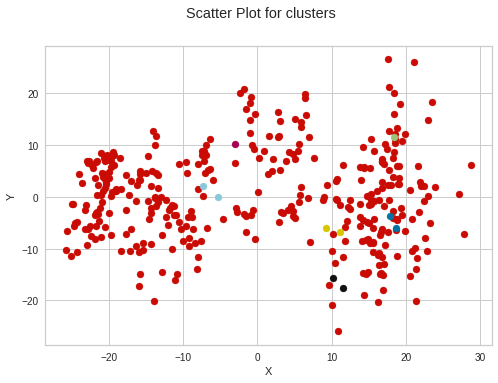

In [47]:
hierarchical_clustering(trans_data,"single",3)